# Question-6

Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend

In [1]:
# Importing necessary Libraries

import numpy as np
import pandas as pd 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [2]:
df_train = pd.read_csv("C:\\Users\\ASUS\\Downloads\\train_loan_prediction.csv")
df_test = pd.read_csv("C:\\Users\\ASUS\\Downloads\\test_loan_prediction.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df_train.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df_test.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
df_test.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
nunique = df_train.nunique()
df = df_train[[col for col in df_train if nunique[col] > 1 and nunique[col] <5]] 
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [13]:
for column in df.columns:
    df_train[column].fillna( method ='ffill', inplace = True)

In [14]:
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df_train.isna().sum()


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df_train['Loan_Amount_Term'].mean()


342.0

In [17]:
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].replace(np.nan,df_train['Loan_Amount_Term'].mean())
df_train['LoanAmount'] = df_train['LoanAmount'].replace(np.nan,df_train['LoanAmount'].mean())

In [18]:
df_train.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [19]:
df_train.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.835505
std,6109.041673,2926.248369,84.037468,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [20]:
# Using map function
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})

In [21]:
df_train['Loan_Amount_Term'].unique()


array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
df_train['Dependents'].unique()


array(['0', '1', '2', '3+'], dtype=object)

In [23]:
df_train['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [24]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No': 0})
df_train['Dependents'] = df_train['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})

# Education
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})

# Self_Employed
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1, 'No': 0})

# 'Urban', 'Rural', 'Semiurban'
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})


In [25]:
df_train.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1


In [26]:
numeric_column = df.select_dtypes(exclude='int').columns
numeric_column

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

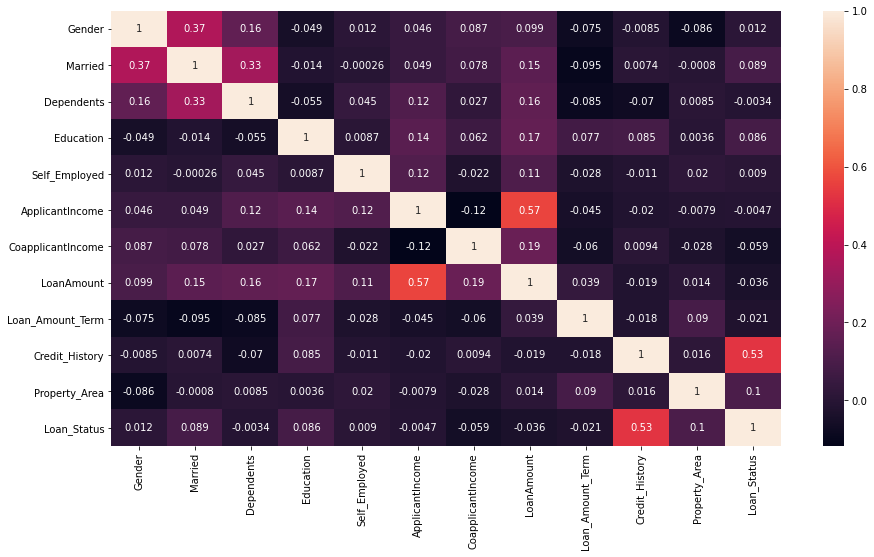

In [27]:
plt.figure(figsize=[15,8])
sns.heatmap(df_train.corr(),annot=True);

In [28]:
# Drop the Loan_ID column
X = df_train.drop('Loan_ID', axis=1)

In [29]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [30]:
X.fillna( method ='ffill', inplace = True)


In [31]:
X = pd.get_dummies(X , drop_first = True)
X 


,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0
610,1.0,1,1,0,0,1,0,0,0,0
611,1.0,1,1,1,0,0,0,0,0,1
612,1.0,1,1,0,1,0,0,0,0,1


In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42, stratify=y)


In [33]:
y_test.value_counts()


Y    106
N     48
Name: Loan_Status, dtype: int64

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [35]:
x_train_scaled

array([[ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872, -0.69560834],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
         1.26446434, -0.69560834],
       ...,
       [ 0.4307749 ,  0.47265659,  0.73379939, ...,  2.46514159,
         1.26446434, -0.69560834],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058]])

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.93      0.56      0.70        48
           Y       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [38]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(x_train_scaled,y_train)

SVC()

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [39]:
from sklearn.metrics import accuracy_score
y_pred_classifier = classifier.predict(x_test_scaled)
accuracy_score(y_test, y_pred_classifier)

0.8506493506493507

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_classifier))

              precision    recall  f1-score   support

           N       0.93      0.56      0.70        48
           Y       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('evaluation on training', rf.score(x_train_scaled,y_train))
print('evaluation on testing', rf.score(x_test_scaled,y_test))

evaluation on training 0.8326086956521739
evaluation on testing 0.7922077922077922


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           N       0.71      0.56      0.63        48
           Y       0.82      0.90      0.86       106

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.78       154



In [43]:
## KNN regressor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred_knn = knn.predict(x_test_scaled)
print('evaluation on training', knn.score(x_train_scaled,y_train))
print('evaluation on testing', knn.score(x_test_scaled,y_test))

evaluation on training 0.7978260869565217
evaluation on testing 0.8246753246753247


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           N       0.82      0.56      0.67        48
           Y       0.83      0.94      0.88       106

    accuracy                           0.82       154
   macro avg       0.82      0.75      0.77       154
weighted avg       0.82      0.82      0.81       154

